# Predict Humidity for Multiple Weather Parameters (Time Series Data)

The daily temperate, wind, rainfall and humidity of a location is recorded and noted in the input dataset from 1990~2020s. 

Build a time series model to predict the humidity in Y2021, given these features: temperate, wind, rainfall. 2020Q4 data can be used as test dataset, while the remaining for training the model. To verify the model, you can use any metric to compare prediction and actual humidity values in 2020Q4.

In [104]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.4f' % x)
import seaborn as sns
sns.set_context("paper", font_scale=1.3)
sns.set_style('white')
import warnings
warnings.filterwarnings('ignore')
from time import time
import matplotlib.ticker as tkr
from scipy import stats
from statsmodels.tsa.stattools import pacf
%matplotlib inline

# from tensorflow.keras import Sequential
# # from tensorflow.keras.layers import Dropout, LSTM, Dense
# from tensorflow.keras.layers import *
# from tensorflow.keras.callbacks import EarlyStopping

import math
# import keras
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM
# from keras.layers import Dropout
# from keras.layers import *

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# from keras.callbacks import EarlyStopping

In [105]:
# import tensorflow as tf 
# tf.test.gpu_device_name() 

# Loading  Data

In [106]:
# Importing necessary modules
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Importing the statistics module
from statistics import mean
from statistics import median

# To load the input data
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot

# used to format headings 
bold = '\033[1m'
end = '\033[0m'

# from google.colab import drive
# drive.mount('/content/gdrive')

# Read the s&p 500 input data set and sorting based on date.
observed = pd.read_csv("./observed_1.csv", index_col=False)

observed.head()


# sp500["Date"] = pd.to_datetime(sp500["Date"])
# sp_sorted = sp500.sort_values("Date")

# print(sp_sorted.head(3))
# print(sp_sorted.tail(3))

,date,temp,wind,rainfall,humidity
0,19900101,28.4000,17.9600,20.4000,32.1800
1,19900102,35.5000,2.2300,0.0000,22.8400
2,19900103,17.4000,9.0600,0.0000,29.3800
3,19900104,28.4000,1.5700,0.0000,26.3000
4,19900105,28.3000,0.3000,0.0000,26.7500


In [107]:
len(observed)
# observed['temp'] < 100

11231

# Data Filtering

In [108]:
# len(observed_filtered)
# observed["temp"] > 100

observed_filtered = observed[observed['temp'] < 100] 
len(observed_filtered)

11127

10% code filtered out.

In [109]:
len(observed_filtered)

11127

In [110]:
from datetime import datetime
day_of_year = datetime.now().timetuple().tm_yday
day_of_year

133

In [111]:
# datetime.now()
date_time_obj = datetime.strptime("040205", '%y%m%d')
date_time_obj.timetuple().tm_yday

36

In [112]:
def convert_to_date(date):
    date_as_string = str(date)
    date_as_string = date_as_string[2:]
    date_time_obj = datetime.strptime(date_as_string, '%y%m%d')
    return date_time_obj
    
def convert_to_daynum(date):
    date_as_string = str(date)
    date_as_string = date_as_string[2:]
    date_time_obj = datetime.strptime(date_as_string, '%y%m%d')

    return date_time_obj.timetuple().tm_yday

#     return int(year_as_string)

observed_filtered['day'] = observed_filtered['date'].apply(convert_to_daynum)

observed_filtered['date'] = observed_filtered['date'].apply(convert_to_date)

In [113]:
observed_filtered.head()

,date,temp,wind,rainfall,humidity,day
0,1990-01-01,28.4000,17.9600,20.4000,32.1800,1
1,1990-01-02,35.5000,2.2300,0.0000,22.8400,2
2,1990-01-03,17.4000,9.0600,0.0000,29.3800,3
3,1990-01-04,28.4000,1.5700,0.0000,26.3000,4
4,1990-01-05,28.3000,0.3000,0.0000,26.7500,5


In [114]:
df = observed_filtered

# df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['week'] = df['date'].apply(lambda x: x.week)
df['month'] = df['date'].apply(lambda x: x.month)
df['dayinmonth'] = df['date'].apply(lambda x: x.day)
df['humScale'] = df['temp'] * df['rainfall'] 

df.sort_values('date', inplace=True, ascending=True)
# df=df.loc[:,['date','year','quarter','month','dayinmonth', 'temp', 'wind', 'rainfall', 'day', 'humidity']]
df=df.loc[:,['week', 'temp', 'wind', 'rainfall', 'day', 'humScale', 'humidity']]
df = df.reset_index(drop=True)
df.head(10)

,week,temp,wind,rainfall,day,humScale,humidity
0,1,28.4000,17.9600,20.4000,1,579.3600,32.1800
1,1,35.5000,2.2300,0.0000,2,0.0000,22.8400
2,1,17.4000,9.0600,0.0000,3,0.0000,29.3800
3,1,28.4000,1.5700,0.0000,4,0.0000,26.3000
4,1,28.3000,0.3000,0.0000,5,0.0000,26.7500
5,1,35.4000,14.0400,0.0000,6,0.0000,20.7900
6,1,11.4000,5.6700,0.0000,7,0.0000,32.9600
7,2,29.5000,18.3600,0.0000,8,0.0000,21.8500
8,2,12.8000,19.2400,0.0000,9,0.0000,29.5500
9,2,32.2000,9.2700,0.0000,10,0.0000,22.7400


11127


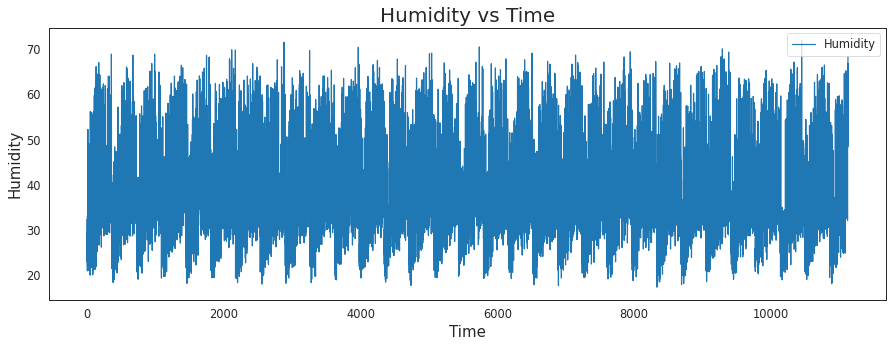

In [115]:
# Visualization Module - Humidity

humidity = df['humidity']
x = np.arange(0, len(humidity))
print(len(humidity))

plt.figure(figsize=(15,5))
plt.plot(x, humidity, label="Humidity")

plt.legend()
plt.title("Humidity vs Time", fontsize=20)
plt.ylabel("Humidity", fontsize=15)
plt.xlabel("Time", fontsize=15)
plt.show()


# Random Forest Regression on Spark

In [116]:
from pyspark.ml.feature import VectorAssembler

# Assemble all the features with VectorAssembler
def assembleFeatures(dfRDD):

    required_features = ['week',
                        'temp',
                        'wind',
                        'rainfall',
                        'day',
                        'humScale'
                       ]

    assembler = VectorAssembler(inputCols=required_features, outputCol='features')

    transformed_data = assembler.transform(dfRDD)
    
    return transformed_data

In [117]:
def trainRFmodel(trainingData):

    # Train a RandomForest model.
    rf = RandomForestRegressor(featuresCol="features")

    # Chain indexer and forest in a Pipeline
    pipeline = Pipeline(stages=[rf])

    # Train model.  This also runs the indexer.
    model = pipeline.fit(trainingData)
    
    return model

In [118]:
def testRFmodel(model, testData, isLabelled):

    # Make predictions.
    predictions = model.transform(testData)

    # Select example rows to display.
    if isLabelled:
        predictions.select("prediction", "label", "features").show(5)
        
        # Select (prediction, true label) and compute test error
        evaluator = RegressionEvaluator(
            labelCol="label", predictionCol="prediction", metricName="rmse")
        rmse = evaluator.evaluate(predictions)
        print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)
    else:
        predictions.select("prediction", "features").show(5)

    rfModel = model.stages[0]
    print(rfModel)  # summary only
    
    return predictions.select("prediction", "features")

In [119]:
import pyspark
from datetime import datetime
from pyspark.ml import Pipeline
from pyspark.ml.regression import RandomForestRegressor
from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession


if not 'sc' in globals():
    sc = SparkContext('local')
    spark = SparkSession(sc)


df.columns = ['week', 'temp', 'wind', 'rainfall', 'day', 'humScale', 'label']

dfRDD = spark.createDataFrame(df)

transformed_data = assembleFeatures(dfRDD)
transformed_data.show()

# Split the data
(trainingData, testData) = transformed_data.randomSplit([0.9,0.1])


a = datetime.now()

model = trainRFmodel(trainingData)

b = datetime.now()

testRFmodel(model, testData, True)


+----+----+-----+--------+---+------------------+-----+--------------------+
|week|temp| wind|rainfall|day|          humScale|label|            features|
+----+----+-----+--------+---+------------------+-----+--------------------+
|   1|28.4|17.96|    20.4|  1| 579.3599999999999|32.18|[1.0,28.4,17.96,2...|
|   1|35.5| 2.23|     0.0|  2|               0.0|22.84|[1.0,35.5,2.23,0....|
|   1|17.4| 9.06|     0.0|  3|               0.0|29.38|[1.0,17.4,9.06,0....|
|   1|28.4| 1.57|     0.0|  4|               0.0| 26.3|[1.0,28.4,1.57,0....|
|   1|28.3|  0.3|     0.0|  5|               0.0|26.75|[1.0,28.3,0.3,0.0...|
|   1|35.4|14.04|     0.0|  6|               0.0|20.79|[1.0,35.4,14.04,0...|
|   1|11.4| 5.67|     0.0|  7|               0.0|32.96|[1.0,11.4,5.67,0....|
|   2|29.5|18.36|     0.0|  8|               0.0|21.85|[2.0,29.5,18.36,0...|
|   2|12.8|19.24|     0.0|  9|               0.0|29.55|[2.0,12.8,19.24,0...|
|   2|32.2| 9.27|     0.0| 10|               0.0|22.74|[2.0,32.2,9.27,0....|

DataFrame[prediction: double, features: vector]

In [120]:
# Time Taken for Training Random Forest
c = b - a
c
c.total_seconds()

0.707555

# 2020 Prediction

In [121]:

# Read the s&p 500 input data set and sorting based on date.
observed_2020 = pd.read_csv("./test_input_1.csv", index_col=False)

observed_2020.head()

,date,temp,wind,rainfall
0,20201001,30.1000,16.7600,0.0000
1,20201002,24.7000,18.6800,30.9000
2,20201003,30.0000,5.3400,13.9000
3,20201004,23.7000,10.9500,0.0000
4,20201005,27.4000,4.4200,0.0000


In [122]:

observed_2020['day'] = observed_2020['date'].apply(convert_to_daynum)

observed_2020['date'] = observed_2020['date'].apply(convert_to_date)

In [123]:
df = observed_2020

# df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['week'] = df['date'].apply(lambda x: x.week)
df['month'] = df['date'].apply(lambda x: x.month)
df['dayinmonth'] = df['date'].apply(lambda x: x.day)

df['humScale'] = df['temp'] * df['rainfall']

df.sort_values('date', inplace=True, ascending=True)
# df=df.loc[:,['date','year','quarter','month','dayinmonth', 'temp', 'wind', 'rainfall', 'day', 'humidity']]
df=df.loc[:,['week', 'temp', 'wind', 'rainfall', 'day', 'humScale']]

df = df.reset_index(drop=True)
df.head()

,week,temp,wind,rainfall,day,humScale
0,40,30.1000,16.7600,0.0000,275,0.0000
1,40,24.7000,18.6800,30.9000,276,763.2300
2,40,30.0000,5.3400,13.9000,277,417.0000
3,40,23.7000,10.9500,0.0000,278,0.0000
4,41,27.4000,4.4200,0.0000,279,0.0000


In [124]:

# df.columns = ['week', 'temp', 'wind', 'rainfall', 'day', 'humScale']

dfRDD_2020 = spark.createDataFrame(df)

transformed_data_2020 = assembleFeatures(dfRDD_2020)
transformed_data_2020.show()

# Split the data
# (trainingData, testData) = transformed_data_2020.randomSplit([0.9,0.1])

+----+----+-----+--------+---+------------------+--------------------+
|week|temp| wind|rainfall|day|          humScale|            features|
+----+----+-----+--------+---+------------------+--------------------+
|  40|30.1|16.76|     0.0|275|               0.0|[40.0,30.1,16.76,...|
|  40|24.7|18.68|    30.9|276| 763.2299999999999|[40.0,24.7,18.68,...|
|  40|30.0| 5.34|    13.9|277|             417.0|[40.0,30.0,5.34,1...|
|  40|23.7|10.95|     0.0|278|               0.0|[40.0,23.7,10.95,...|
|  41|27.4| 4.42|     0.0|279|               0.0|[41.0,27.4,4.42,0...|
|  41|27.0|19.77|     0.0|280|               0.0|[41.0,27.0,19.77,...|
|  41|39.1| 5.64|    26.3|281|1028.3300000000002|[41.0,39.1,5.64,2...|
|  41|14.8|18.42|    58.8|282|            870.24|[41.0,14.8,18.42,...|
|  41|30.2|12.62|     4.6|283|            138.92|[41.0,30.2,12.62,...|
|  41|39.1|13.22|    42.6|284|           1665.66|[41.0,39.1,13.22,...|
|  41|26.0| 0.47|    12.6|285|327.59999999999997|[41.0,26.0,0.47,1...|
|  42|

In [125]:
predictions = testRFmodel(model, transformed_data_2020, False)

+------------------+--------------------+
|        prediction|            features|
+------------------+--------------------+
| 32.20830783606222|[40.0,30.1,16.76,...|
| 47.66172019462211|[40.0,24.7,18.68,...|
| 36.91692828834477|[40.0,30.0,5.34,1...|
| 36.29618670970944|[40.0,23.7,10.95,...|
|34.518216809078346|[41.0,27.4,4.42,0...|
+------------------+--------------------+
only showing top 5 rows

RandomForestRegressionModel: uid=RandomForestRegressor_eb943272c2fa, numTrees=20, numFeatures=6


In [126]:
predictions.toPandas()

,prediction,features
0,32.2083,"[40.0, 30.1, 16.76, 0.0, 275.0, 0.0]"
1,47.6617,"[40.0, 24.7, 18.68, 30.9, 276.0, 763.229999999..."
2,36.9169,"[40.0, 30.0, 5.34, 13.9, 277.0, 417.0]"
3,36.2962,"[40.0, 23.7, 10.95, 0.0, 278.0, 0.0]"
4,34.5182,"[41.0, 27.4, 4.42, 0.0, 279.0, 0.0]"
...,...,...
87,40.2732,"[52.0, 20.8, 3.05, 7.7, 362.0, 160.16]"
88,37.5332,"[53.0, 17.9, 18.23, 0.0, 363.0, 0.0]"
89,38.2464,"[53.0, 12.9, 17.6, 0.0, 364.0, 0.0]"
90,31.1965,"[53.0, 36.0, 14.04, 0.0, 365.0, 0.0]"


In [127]:
# Rearranging the predictions for 2020Q4
predsQ4 = np.array(predictions.toPandas()['prediction']).reshape(92, -1)

print(predsQ4.shape)

(92, 1)


In [128]:

# Read the input data set to get actual humidity values to compare with prediction
output_2020 = pd.read_csv("./test_output_1.csv", index_col=False)

output_2020.head(10)

,date,humidity
0,20201001,31.2900
1,20201002,47.7500
2,20201003,40.6100
3,20201004,35.0200
4,20201005,35.4100
5,20201006,31.5900
6,20201007,42.4600
7,20201008,65.4000
8,20201009,34.6400
9,20201010,48.6100


In [129]:
output_2020['humidity'].values

array([31.29, 47.75, 40.61, 35.02, 35.41, 31.59, 42.46, 65.4 , 34.64,
       48.61, 43.02, 57.72, 38.63, 37.04, 37.3 , 33.52, 34.01, 40.49,
       28.1 , 30.26, 34.81, 29.01, 34.48, 34.16, 37.69, 42.83, 29.66,
       44.36, 38.44, 28.85, 27.89, 42.83, 32.84, 27.73, 38.41, 37.66,
       41.86, 38.19, 61.67, 34.65, 54.75, 35.57, 51.06, 44.62, 38.22,
       54.04, 41.44, 35.86, 43.07, 34.46, 34.57, 45.52, 40.59, 34.22,
       36.4 , 59.79, 44.05, 39.68, 29.65, 34.49, 38.43, 41.22, 54.06,
       37.13, 36.56, 35.29, 38.2 , 28.29, 33.15, 34.49, 57.48, 41.61,
       41.57, 32.91, 45.79, 57.77, 37.57, 43.88, 39.45, 36.27, 45.88,
       37.76, 38.66, 37.34, 33.98, 33.85, 32.99, 43.97, 38.32, 40.95,
       30.78, 36.32])

In [130]:
# len(actual_humidity)
# len(np.array(predictions.toPandas()['prediction']))
actual_humidity = output_2020['humidity'].values
mean_squared_error(actual_humidity, predsQ4)


5.89207722058151

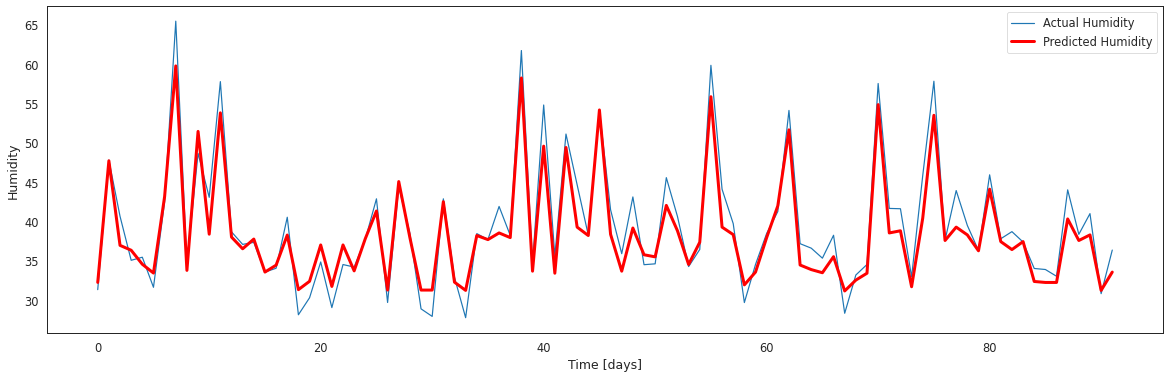

In [131]:
from matplotlib import pyplot


plt.figure(figsize=(20, 6))
pyplot.plot(actual_humidity, label='Actual Humidity')
pyplot.plot(predsQ4, color='red', linewidth=3, label='Predicted Humidity')
plt.xlabel('Time [days]')
plt.ylabel('Humidity')
plt.legend(loc='best')
pyplot.show()

In [132]:
# np.array(predictions.toPandas()['prediction'])
actual_humidity

array([31.29, 47.75, 40.61, 35.02, 35.41, 31.59, 42.46, 65.4 , 34.64,
       48.61, 43.02, 57.72, 38.63, 37.04, 37.3 , 33.52, 34.01, 40.49,
       28.1 , 30.26, 34.81, 29.01, 34.48, 34.16, 37.69, 42.83, 29.66,
       44.36, 38.44, 28.85, 27.89, 42.83, 32.84, 27.73, 38.41, 37.66,
       41.86, 38.19, 61.67, 34.65, 54.75, 35.57, 51.06, 44.62, 38.22,
       54.04, 41.44, 35.86, 43.07, 34.46, 34.57, 45.52, 40.59, 34.22,
       36.4 , 59.79, 44.05, 39.68, 29.65, 34.49, 38.43, 41.22, 54.06,
       37.13, 36.56, 35.29, 38.2 , 28.29, 33.15, 34.49, 57.48, 41.61,
       41.57, 32.91, 45.79, 57.77, 37.57, 43.88, 39.45, 36.27, 45.88,
       37.76, 38.66, 37.34, 33.98, 33.85, 32.99, 43.97, 38.32, 40.95,
       30.78, 36.32])

# 2021 Prediction

In [136]:

# Read the s&p 500 input data set and sorting based on date.
observed_2021 = pd.read_csv("./forecasted_1.csv", index_col=False)

observed_2021.head()

,date,temp,wind,rainfall
0,20210101,15.7500,6.1700,0.0000
1,20210102,19.1000,2.4950,66.6000
2,20210103,6.9000,9.2800,99.6000
3,20210104,5.6000,6.7850,0.0000
4,20210105,9.0000,5.8500,0.0000


In [137]:

observed_2021['day'] = observed_2021['date'].apply(convert_to_daynum)

observed_2021['date'] = observed_2021['date'].apply(convert_to_date)

In [138]:
df = observed_2021

# df['date']=pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda x: x.year)
df['week'] = df['date'].apply(lambda x: x.week)
df['month'] = df['date'].apply(lambda x: x.month)
df['dayinmonth'] = df['date'].apply(lambda x: x.day)
df['humScale'] = df['temp'] * df['rainfall'] 

df.sort_values('date', inplace=True, ascending=True)
# df=df.loc[:,['date','year','quarter','month','dayinmonth', 'temp', 'wind', 'rainfall', 'day', 'humidity']]
df=df.loc[:,['week', 'temp', 'wind', 'rainfall', 'day', 'humScale']]

df = df.reset_index(drop=True)
df.head()

,week,temp,wind,rainfall,day,humScale
0,53,15.7500,6.1700,0.0000,1,0.0000
1,53,19.1000,2.4950,66.6000,2,1272.0600
2,53,6.9000,9.2800,99.6000,3,687.2400
3,1,5.6000,6.7850,0.0000,4,0.0000
4,1,9.0000,5.8500,0.0000,5,0.0000


In [139]:

# df.columns = ['week', 'temp', 'wind', 'rainfall', 'day', 'humScale']

dfRDD_2021 = spark.createDataFrame(df)

transformed_data_2021 = assembleFeatures(dfRDD_2021)
transformed_data_2021.show()

# Split the data
# (trainingData, testData) = transformed_data_2020.randomSplit([0.9,0.1])

+----+-----+-----+--------+---+------------------+--------------------+
|week| temp| wind|rainfall|day|          humScale|            features|
+----+-----+-----+--------+---+------------------+--------------------+
|  53|15.75| 6.17|     0.0|  1|               0.0|[53.0,15.75,6.17,...|
|  53| 19.1|2.495|    66.6|  2|           1272.06|[53.0,19.1,2.495,...|
|  53|  6.9| 9.28|    99.6|  3|            687.24|[53.0,6.9,9.28,99...|
|   1|  5.6|6.785|     0.0|  4|               0.0|[1.0,5.6,6.785,0....|
|   1|  9.0| 5.85|     0.0|  5|               0.0|[1.0,9.0,5.85,0.0...|
|   1|11.55|8.915|     0.0|  6|               0.0|[1.0,11.55,8.915,...|
|   1|14.25|6.135|    72.0|  7|            1026.0|[1.0,14.25,6.135,...|
|   1| 7.35|8.985|    98.4|  8|            723.24|[1.0,7.35,8.985,9...|
|   1| 14.6|3.545|     0.0|  9|               0.0|[1.0,14.6,3.545,0...|
|   1| 6.75|9.495|     0.0| 10|               0.0|[1.0,6.75,9.495,0...|
|   2|14.75|3.715|     0.0| 11|               0.0|[2.0,14.75,3.7

In [140]:
predictions = testRFmodel(model, transformed_data_2021, False)

+------------------+--------------------+
|        prediction|            features|
+------------------+--------------------+
|34.385110944064095|[53.0,15.75,6.17,...|
| 57.89059949134484|[53.0,19.1,2.495,...|
| 57.78622749021455|[53.0,6.9,9.28,99...|
|31.478627209824886|[1.0,5.6,6.785,0....|
|31.649633133110974|[1.0,9.0,5.85,0.0...|
+------------------+--------------------+
only showing top 5 rows

RandomForestRegressionModel: uid=RandomForestRegressor_eb943272c2fa, numTrees=20, numFeatures=6


In [141]:
predictions.show()

+------------------+--------------------+
|        prediction|            features|
+------------------+--------------------+
|34.385110944064095|[53.0,15.75,6.17,...|
| 57.89059949134484|[53.0,19.1,2.495,...|
| 57.78622749021455|[53.0,6.9,9.28,99...|
|31.478627209824886|[1.0,5.6,6.785,0....|
|31.649633133110974|[1.0,9.0,5.85,0.0...|
|31.478627209824886|[1.0,11.55,8.915,...|
| 54.85391335262938|[1.0,14.25,6.135,...|
|54.753756905307036|[1.0,7.35,8.985,9...|
|31.649633133110974|[1.0,14.6,3.545,0...|
|31.478627209824886|[1.0,6.75,9.495,0...|
|31.649633133110974|[2.0,14.75,3.715,...|
| 37.65051877408099|[2.0,10.55,6.785,...|
|30.377032844763022|[2.0,19.8,1.36,0....|
|31.478627209824886|[2.0,8.9,7.38,0.0...|
|31.478627209824886|[2.0,8.3,9.275,0....|
|31.649633133110974|[2.0,10.7,4.83,0....|
|31.478627209824886|[2.0,6.55,8.395,0...|
|55.077738876208194|[3.0,9.5,7.455,73...|
|31.478627209824886|[3.0,9.3,8.41,0.0...|
|30.881564627469565|[3.0,10.1,9.765,0...|
+------------------+--------------

In [142]:
len(np.array(predictions.toPandas()['prediction']))

365

In [143]:
observed_2021

,date,temp,wind,rainfall,day,year,week,month,dayinmonth,humScale
0,2021-01-01,15.7500,6.1700,0.0000,1,2021,53,1,1,0.0000
1,2021-01-02,19.1000,2.4950,66.6000,2,2021,53,1,2,1272.0600
2,2021-01-03,6.9000,9.2800,99.6000,3,2021,53,1,3,687.2400
3,2021-01-04,5.6000,6.7850,0.0000,4,2021,1,1,4,0.0000
4,2021-01-05,9.0000,5.8500,0.0000,5,2021,1,1,5,0.0000
...,...,...,...,...,...,...,...,...,...,...
360,2021-12-27,12.1000,5.3600,6.2000,361,2021,52,12,27,75.0200
361,2021-12-28,12.6500,4.7600,0.0000,362,2021,52,12,28,0.0000
362,2021-12-29,10.7500,5.9700,0.0000,363,2021,52,12,29,0.0000
363,2021-12-30,8.7500,3.7950,110.8000,364,2021,52,12,30,969.5000


In [144]:
# observed_2021[0,]
preds2concat = np.array(predictions.toPandas()['prediction']).reshape(365,-1)
result = np.concatenate((observed_2021, preds2concat), axis=1)
result

array([[Timestamp('2021-01-01 00:00:00'), 15.75, 6.17, ..., 1, 0.0,
        34.385110944064095],
       [Timestamp('2021-01-02 00:00:00'), 19.1, 2.495, ..., 2, 1272.06,
        57.89059949134484],
       [Timestamp('2021-01-03 00:00:00'), 6.9, 9.28, ..., 3, 687.24,
        57.78622749021455],
       ...,
       [Timestamp('2021-12-29 00:00:00'), 10.75, 5.97, ..., 29, 0.0,
        39.120175138923855],
       [Timestamp('2021-12-30 00:00:00'), 8.75, 3.795, ..., 30, 969.5,
        61.746548975270414],
       [Timestamp('2021-12-31 00:00:00'), 13.05, 8.91, ..., 31, 0.0,
        38.832408942302735]], dtype=object)

In [145]:
# pd.write_csv(result)
result = pd.DataFrame(result)
result.to_csv('./result.csv', index=True)  